In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mahotas as mh

In [3]:
img = mh.imread('067.png')

In [4]:
bbox = '200.319, 178.98, 243.662, 208.319'
bbox = [v.strip() for v in bbox.split(',')]
bbox = [float(v) for v in bbox]
bbox = [int(v) for v in bbox]

In [5]:
th = lambda x: x if x > 0 else 0
th_vector = np.vectorize(th)
def preprocess_image(im):
    im = (im.astype(np.int32) - 32768).astype(np.int16)
    im = ((im + 1024)/(1024 + 3071))*255
    im = th_vector(im)
    im = im.astype(np.uint8)
    return(im) 

In [6]:
img2 = preprocess_image(img)

In [8]:
img2.min(), img2.max()

(0, 142)

In [41]:
FIXED_SIZE = (50,50)
def crop(img, bbox):

#### REMMEBER TO PUT BACK IN IF YOU CALL CROP on a filename..
#     img = mh.imread(img) 
#     bbox = bbox.split(',')
#     bbox = [int(float(v)) for v in bbox]

    # convert bbox to fixed size
    diff_x = bbox[2] - bbox[0]
    diff_y = bbox[3] - bbox[1]

    pad_x = FIXED_SIZE[0] - diff_x
    pad_y = FIXED_SIZE[1] - diff_y
    
    padded_lesion = img[bbox[1]-int(pad_y/2):bbox[3]+int(pad_y/2), 
                            bbox[0]-int(pad_x/2):bbox[2]+int(pad_x/2)]

         
           
    if img.shape[0] != FIXED_SIZE[0] or img.shape[1] != FIXED_SIZE[1]:
        new_padded = np.zeros(FIXED_SIZE, np.uint8)
        new_padded[:,:] = padded_lesion.min()
        new_padded[0:padded_lesion.shape[0], 0:padded_lesion.shape[1]] = padded_lesion
        padded_lesion = new_padded
#          padded_lesion = resize(padded_lesion,FIXED_SIZE )

    #print(padded_lesion.shape)
    
    return padded_lesion

In [42]:
padded = crop(img2, bbox)

(50, 50)


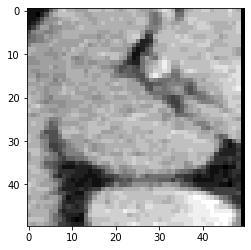

In [43]:
print(padded.shape)
imshow(padded,cmap='gray')

In [40]:
padded.min(), padded.max()

(0, 72)

In [19]:
padded.dtype

dtype('uint8')

In [31]:
padded3 = mh.imresize(padded, FIXED_SIZE)

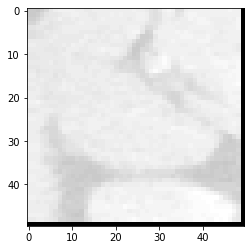

In [32]:
imshow(padded3, cmap='gray')

In [33]:
padded3.shape

(50, 50)

In [25]:
padded3.min(), padded3.max()

(0.0, 72.0)

In [ ]:
np.pad()